In [17]:
import networkx as nx
import numpy as np
import json
from plotter_lib import *

from pySankey import sankey
import plotly.graph_objects as go


In [26]:
Xc = json.load( open("Xc.json","r") )
edgelist= np.loadtxt("red_optima.edgelist", dtype=str)
players = sorted(list(set(edgelist[:,0].tolist()+edgelist[:,1].tolist())), key= lambda s:int(s.split("er")[-1]))

players


['Player1',
 'Player2',
 'Player3',
 'Player4',
 'Player5',
 'Player6',
 'Player7',
 'Player8',
 'Player9',
 'Player10']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


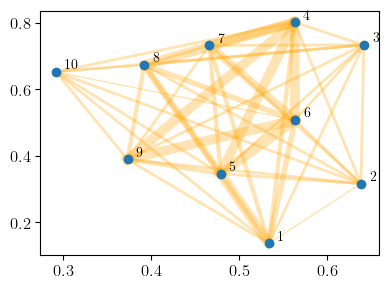

In [39]:

plot = Plotter()

# plot centros
C = np.array([ [Xc[player]["xc"], Xc[player]["yc"]] for player in players])
plot.ax.scatter( C[:,0], C[:,1], zorder=3 )

# nombre jugadores
delta=0.01
for player in Xc.keys():
    plot.ax.annotate(  player.split("r")[-1], xy=( Xc[player]["xc"]+delta , Xc[player]["yc"]+delta )  )

    
# plot link
for link in edgelist:

    n1,n2,w = link[0],link[1], int(link[2])

    x1,y1 = Xc[n1]["xc"], Xc[n1]["yc"]
    x2,y2 = Xc[n2]["xc"], Xc[n2]["yc"]

    if w>0:
        plot.ax.plot( [x1,x2], [y1,y2], linewidth= int(w) , alpha=0.3, c='orange')



plot.show()


In [45]:
label = players
source = []
target = []
value = []

player2indix = {  players[i]:i for i in range(len(players)) }

for link in edgelist:

    i1,i2,w = player2indix[link[0]], player2indix[link[1]], int(link[2])

    source.append(i1)
    target.append(i2)
    value.append(w)




fig = go.Figure(data=[go.Sankey(
    arrangement = "",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = label,
      color = "blue"
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()
